In [45]:
import jax
import jax.numpy as jnp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
class MyLinearRegression():
    def __init__(self, random_state:int=12):
        self.key = jax.random.key(random_state)

    def fit(self, X:jax.Array, y:jax.Array):
        self.variance = jnp.var(y) # variance of the target variable y and the residuals

        self.design_matrix = jnp.vstack((jnp.ones(X.shape[0]), X.T)).T

        lhs = jnp.dot(self.design_matrix.T, self.design_matrix) # Gram Matrix
        rhs = jnp.dot(self.design_matrix.T, y)

        inverse_gram_matrix = jnp.linalg.inv(lhs)

        self.coeff = jnp.dot(inverse_gram_matrix, rhs) # Solving Normal Equation
        return self

    def predict(self, X:jax.Array):
        self.design_matrix = jnp.vstack((jnp.ones(X.shape[0]), X.T)).T
        return jnp.dot(self.design_matrix, self.coeff) 

### DATA 1: Standard Linear Relationship

In [47]:
x = jnp.linspace(0, 10, 100)
y = 2 * x + 1 + jax.random.normal(jax.random.PRNGKey(12), shape=(x.shape[0],))
df1 = pd.DataFrame({'x': x, 'y': y})

y.shape

(100,)

In [48]:
model_fitted = MyLinearRegression().fit(x, y)
y_pred = model_fitted.predict(x)

model_fitted.coeff

Array([0.76906997, 2.043794  ], dtype=float32)

In [49]:
X = model_fitted.design_matrix

jnp.isclose(jnp.trace(X @ jnp.linalg.inv(X.T@X) @ X.T), X.shape[1])

Array(True, dtype=bool)

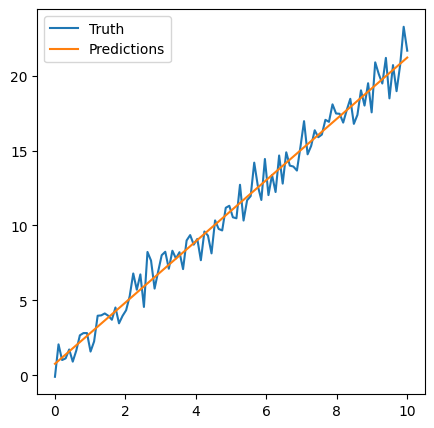

In [50]:
plt.figure(figsize=(5,5))
plt.plot(x, y, label='Truth')
plt.plot(x, y_pred, label='Predictions')
plt.legend()
plt.show()

### DATA 2: Higher Dimensions

In [54]:
x1 = jnp.linspace(0,10,100)
x2 = jnp.linspace(-10,10,100)
X = jnp.vstack([x1, x2]).T

design_matrix = jnp.vstack((jnp.ones(X.shape[0]), X.T)).T 

y = design_matrix @ jnp.array([5,3,2]) + jax.random.normal(jax.random.PRNGKey(12), shape=(len(x1),))

design_matrix = jnp.vstack((jnp.ones(X.shape[0]), X.T)).T 
_lambda = jnp.linalg.det(design_matrix.T @ design_matrix)

jnp.linalg.inv(design_matrix.T @ design_matrix) @ design_matrix.T @ y

Array([130.9917  , -41.129025,  28.312298], dtype=float32)

In [52]:
model = MyLinearRegression().fit(X, y)

model.predict(X)[1], y[1], model.coeff

(Array(-180.12497, dtype=float32),
 Array(-13.431677, dtype=float32),
 Array([102.53715 , -42.046654,  28.41555 ], dtype=float32))

In [53]:
from sklearn.linear_model import LinearRegression

model_sk_fitted = LinearRegression().fit(X, y)

model_sk_fitted.predict(X)[2], model.predict(X)[2], y[2], model_sk_fitted.coef_

(np.float32(-13.807932),
 Array(-178.63159, dtype=float32),
 Array(-13.971927, dtype=float32),
 array([1.4087583, 2.8175173], dtype=float32))